# SUPPLY CHAIN MANAGEMENT

#### OVERVIEW

A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two
years back. Their higher management has noticed that there is a mismatch in the demand and
supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in
inventory cost and ultimately loss to the company. Hence, the higher management wants to
optimize the supply quantity in each and every warehouse in the entire country.

#### GOALS

The objective of this exercise is to build a model, using historical data that will determine an
optimum weight of the product to be shipped each time from the respective warehouse.
1. Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2. Highlight any trend in data, deep insight, novel steps that you take
3. Highlight next steps and improvements.
4. Apply 5 to 6 machine learning algorithms and evaluate it using Test dataset .

#### Data Dictionary

Ware_house_ID       -             Unique Warehouse id where product is prepared for dispatch.
                              dtype: Object
                              
WH_Manager_ID       -             Manager Id present in the warehouse
                              dtype: Object.
                              
zone                -             Zone of the Warehouse, dtype: String

WH_regional_zone    -            Regional Zone of the warehouse, dtype: Object

num_refill_req_l3m  -         Refilling request received by the warehouse in the last 3 months, dtype: integer.

transport_issue_l1y  -         No. of transport issued for warehouse in last 1 year, dtype: integer.

Competitor_in_mkt    -         No. of competitors in the market, dtype: integer.

retail_shop_num      -         Number of retail shops who sell noodles produced by the warehouse,                                    dtype: integer.

wh_owner_type        -         The warehouse is owned by the company or it is on rent, dtype: String.

distributor_num            -         No. of distributor who works between warehouse and retail shops,                                      dtype: integer.

flood_impacted             -         Is the warehouse in a flood impacted area or not, dtype: integer.

flood_proof                -         Warehouse is having flood proof indicator, dtype: integer.

electric_supply            -         Does the warehouse have proper electric supply along with some                                        power backup, dtype: integer.

dist_from_hub              -         distance from the warehouse to production hub, dtype: integer.

workers_num                -         no. workers in the warehouse, dtype: integer.

wh_est_year                -         warehouse establishment year, dtype: integer.

storage_issue_reported_l3m -    storage issues reported by the warehouse in the last 3months.

temp_reg_mach       -          warehouse having temperature regulating machine indicator or not,                                       dtype: integer.

approved_wh_govt_certificate   -      Type of approval warehouse having been issued by government,                                         dtype: Object.

wh_breakdown_l3m        -         Number of times the warehouse faces the breakdown in the last 3                                       months, dtype:integer.

product_wg_ton       -        Product weight, dtype: integer


#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#### Reading data from the csv file

In [3]:
df=pd.read_csv("supply_train.csv")

In [4]:
df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [5]:
df.shape

(16620, 25)

### Exploratory Data Analysis (EDA)¶

In [6]:
df.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [7]:
#information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

#### Data Cleaning

In [8]:
# Now lets drop some supposedly un-necessary columns.
df1 = df.drop(['Unnamed: 0', 'flood_proof','Ware_house_ID', 'WH_Manager_ID', 'wh_owner_type', 'WH_regional_zone', 'wh_est_year', 'approved_wh_govt_certificate', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m','electric_supply','workers_num','flood_impacted','transport_issue_l1y'],axis='columns')

In [9]:
df1.shape

(16620, 10)

In [10]:
df1.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'num_refill_req_l3m',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'dist_from_hub', 'storage_issue_reported_l3m', 'product_wg_ton'],
      dtype='object')

In [11]:
for column in df1.columns:
    if df[column].dtypes=="object":
        print(df[column].value_counts(),"\n")

Rural    15272
Urban     1348
Name: Location_type, dtype: int64 

Large    6743
Mid      6691
Small    3186
Name: WH_capacity_size, dtype: int64 

North    6800
West     5320
South    4223
East      277
Name: zone, dtype: int64 



In [12]:
df1.isnull().sum()  # to find if there is null values

Location_type                 0
WH_capacity_size              0
zone                          0
num_refill_req_l3m            0
Competitor_in_mkt             0
retail_shop_num               0
distributor_num               0
dist_from_hub                 0
storage_issue_reported_l3m    0
product_wg_ton                0
dtype: int64

In [13]:
# checking the number of categorical and numerical columns
def get_cat_and_num_columns(df):
    numerical=[]
    categorical=[]
    for col in df.columns:
        if df[col].dtype=='O':
            categorical.append(col)
        elif df[col].dtype=='int64' or df[col].dtype=='float64':
            numerical.append(col)
    return categorical,numerical

In [14]:
cat_col,num_col= get_cat_and_num_columns(df1)

In [15]:
cat_col

['Location_type', 'WH_capacity_size', 'zone']

In [16]:
num_col

['num_refill_req_l3m',
 'Competitor_in_mkt',
 'retail_shop_num',
 'distributor_num',
 'dist_from_hub',
 'storage_issue_reported_l3m',
 'product_wg_ton']

#### Data Visualization

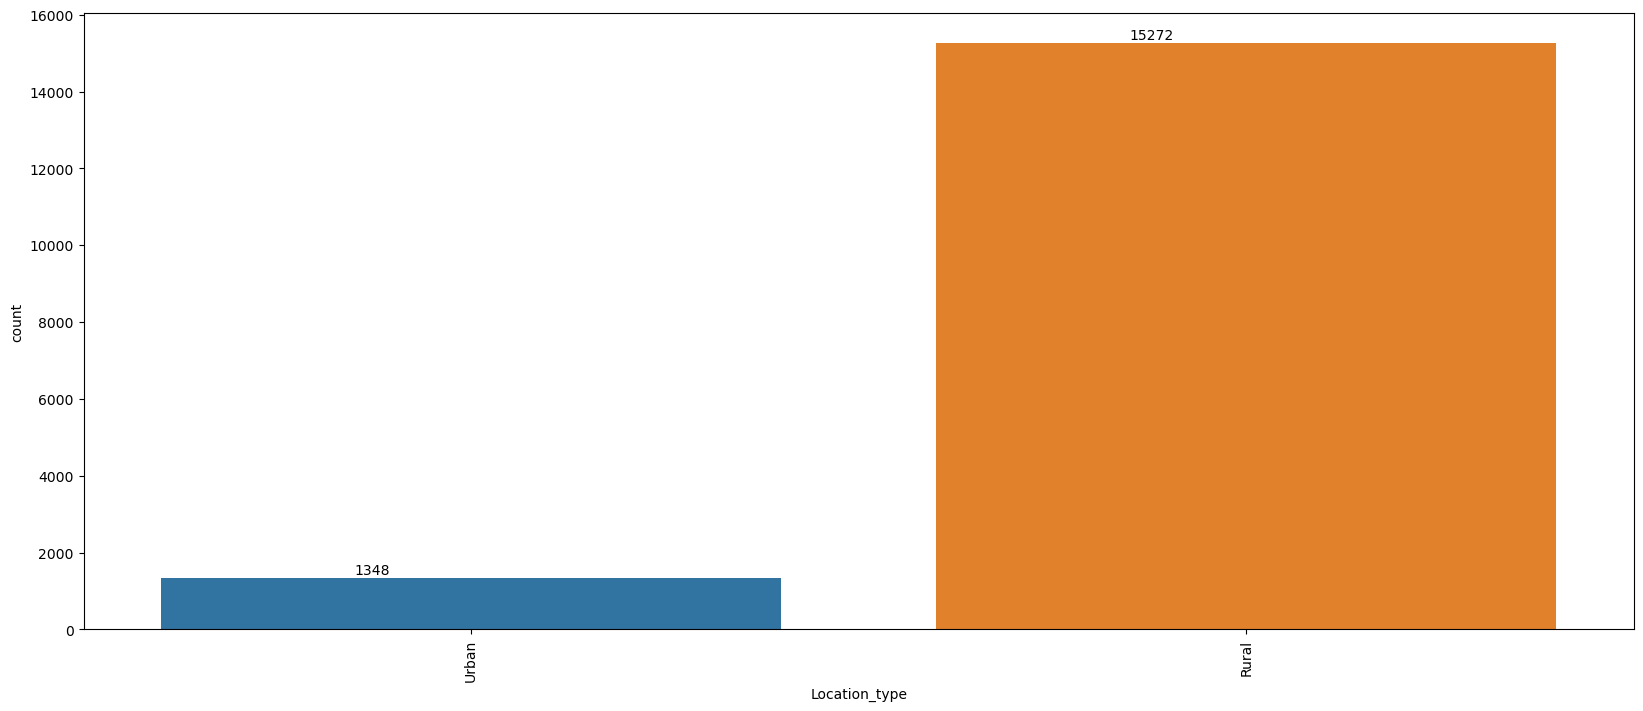

In [17]:
# visualizing the number of locations against the count of it present

plt.figure(figsize =(20,8))
ax=sns.countplot(x= 'Location_type',data =df1)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25,p.get_height()+1), va = 'bottom', color = 'black')

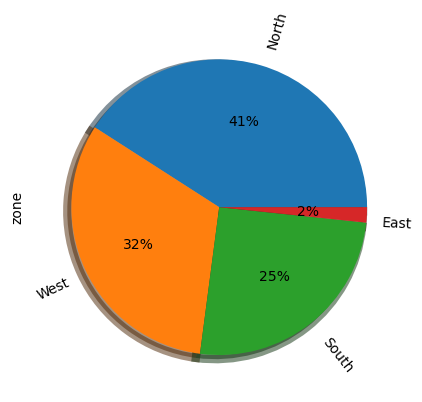

In [18]:
#Location_type visualized in pie chart
df1['zone'].value_counts().plot.pie(autopct="%.lf%%", shadow=True,rotatelabels=True,wedgeprops={'linewidth':6},)
plt.show()

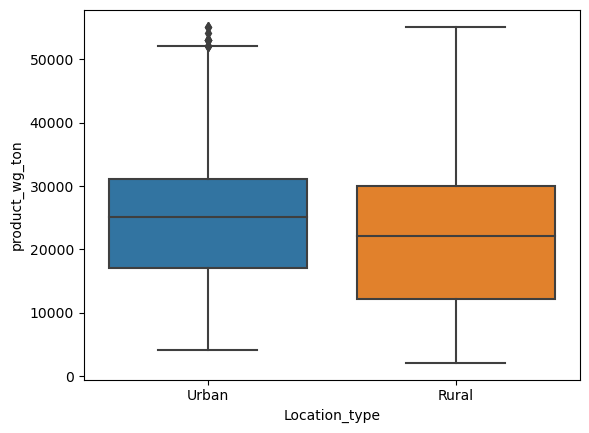

In [19]:
# boxplot Location_type vs product_wg_ton
sns.boxplot(x='Location_type',y='product_wg_ton',data=df1)
plt.show()

#### Plotting distribution in categorical column

Location_type


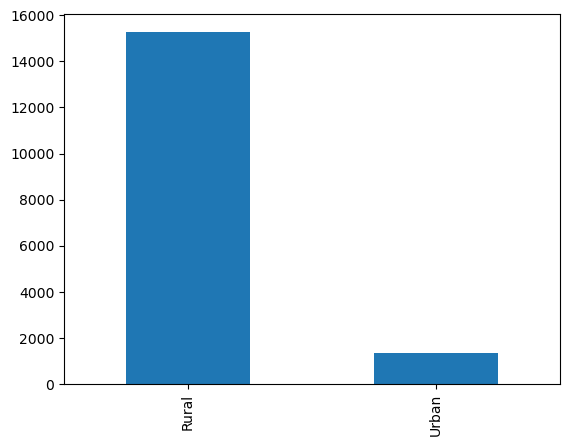

WH_capacity_size


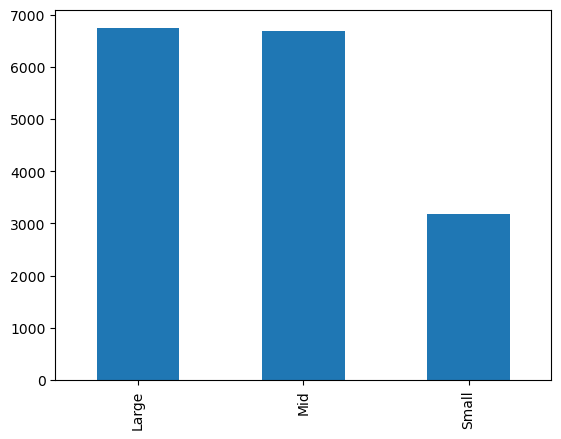

zone


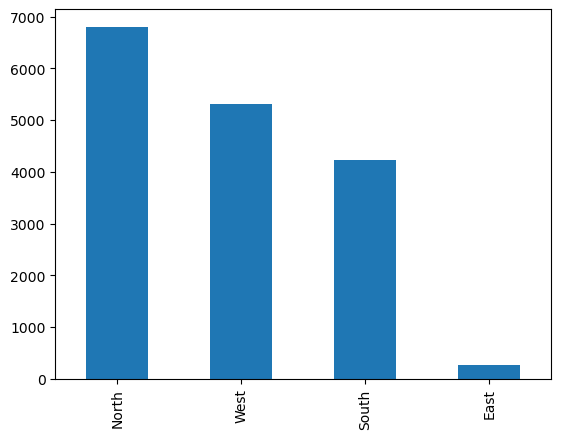

In [20]:
for col in cat_col:  
    if len(df1[col].value_counts())<=10: 
        print(col)
        df1[col].value_counts().plot(kind='bar')
        plt.show()

In [21]:
df1.head()

,Location_type,WH_capacity_size,zone,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton
0,Urban,Small,West,3,2,4651,24,91,13,17115
1,Rural,Large,North,0,4,6217,47,210,4,5074
2,Rural,Mid,South,1,4,4306,64,161,17,23137
3,Rural,Mid,North,7,2,6000,50,103,17,22115
4,Rural,Large,North,3,2,4740,42,112,18,24071


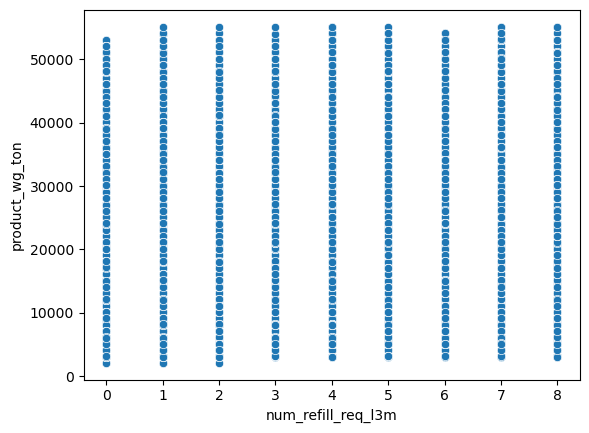

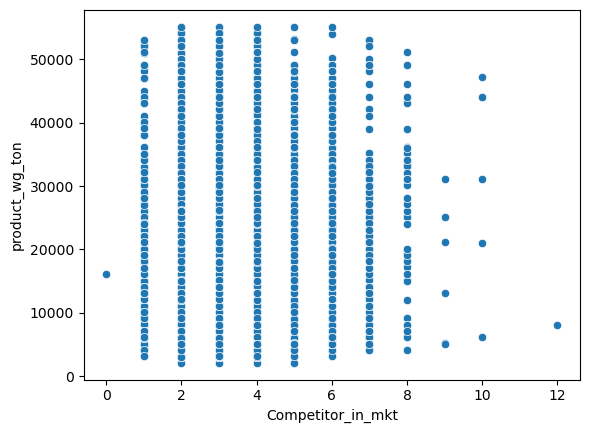

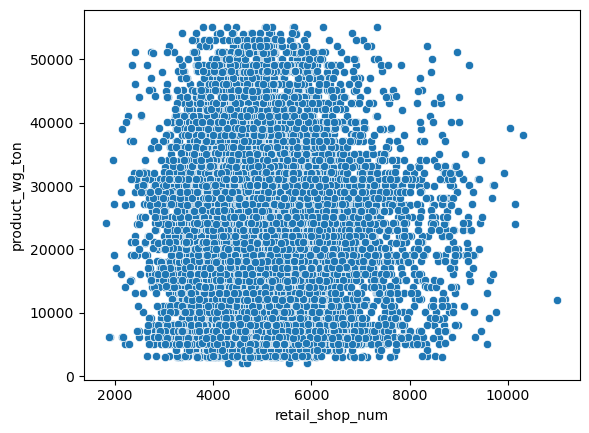

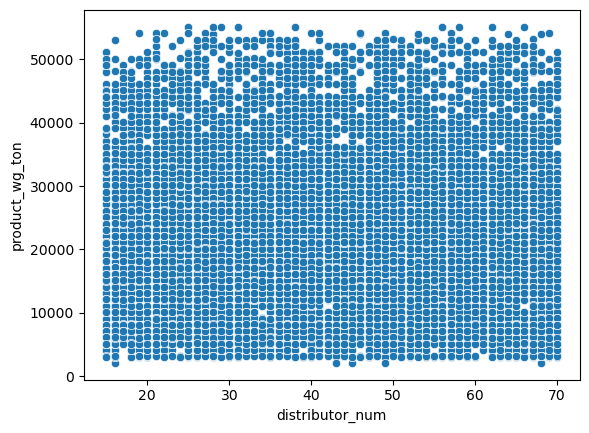

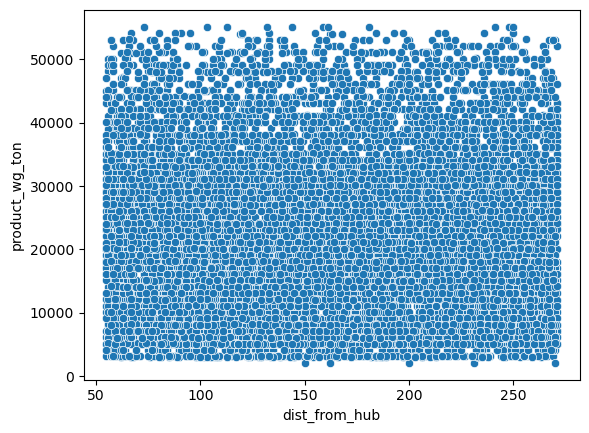

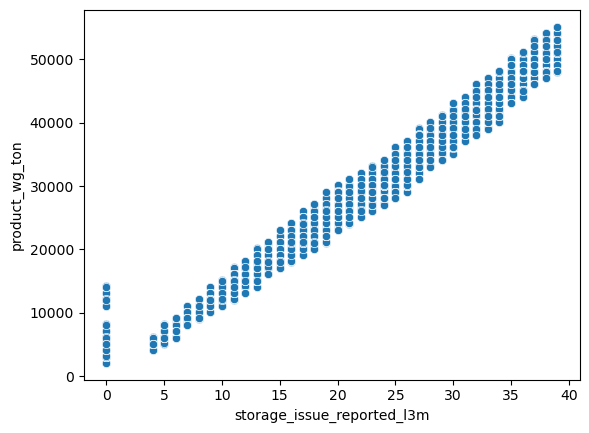

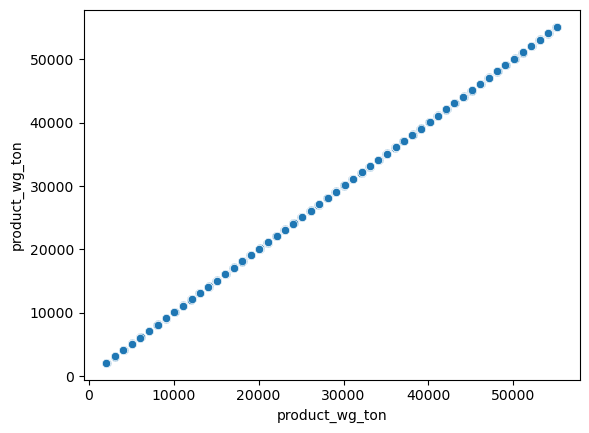

In [22]:
for colm in num_col:
    sns.scatterplot(x=colm,y="product_wg_ton",data=df1)
    plt.show()

In [23]:
# As Location_type is highly unbalanced we can drop that column.
df2 = df1.drop(['Location_type'],axis='columns')

In [24]:
cat_col,num_col= get_cat_and_num_columns(df2)

In [25]:
cat_col

['WH_capacity_size', 'zone']

In [26]:
for column in df2.columns:
    if df[column].dtypes != "object":
        print(f"{df[column].value_counts()}\n")

8    2032
3    1984
5    1967
7    1941
0    1900
4    1885
6    1857
1    1835
2    1219
Name: num_refill_req_l3m, dtype: int64

2     5790
3     4702
4     4438
5      825
6      375
1      291
7      136
8       49
10       6
9        6
12       1
0        1
Name: Competitor_in_mkt, dtype: int64

4808    18
5022    17
4367    17
4611    16
4439    16
        ..
7176     1
3483     1
8522     1
7570     1
7347     1
Name: retail_shop_num, Length: 4356, dtype: int64

21    328
69    323
49    322
35    321
59    319
63    319
47    318
36    317
37    315
41    314
40    314
28    313
44    311
31    311
24    309
42    307
38    307
57    305
30    304
54    303
50    303
65    302
29    302
48    301
23    300
64    299
56    299
22    298
20    297
15    296
62    295
18    293
55    292
26    292
33    291
67    290
66    290
52    289
16    288
32    288
46    287
27    286
70    284
43    284
45    280
58    279
39    279
34    278
17    274
51    274
68    273
61    272
19    2

In [27]:
df2.shape

(16620, 9)

In [28]:
df2.head()

,WH_capacity_size,zone,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton
0,Small,West,3,2,4651,24,91,13,17115
1,Large,North,0,4,6217,47,210,4,5074
2,Mid,South,1,4,4306,64,161,17,23137
3,Mid,North,7,2,6000,50,103,17,22115
4,Large,North,3,2,4740,42,112,18,24071


In [29]:
dummies=pd.get_dummies(df2.WH_capacity_size)
dummies.head()

,Large,Mid,Small
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [30]:
df3=pd.concat([df2,dummies],axis='columns')
df3.head()

,WH_capacity_size,zone,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton,Large,Mid,Small
0,Small,West,3,2,4651,24,91,13,17115,0,0,1
1,Large,North,0,4,6217,47,210,4,5074,1,0,0
2,Mid,South,1,4,4306,64,161,17,23137,0,1,0
3,Mid,North,7,2,6000,50,103,17,22115,0,1,0
4,Large,North,3,2,4740,42,112,18,24071,1,0,0


In [31]:
df4 = df3.drop(['WH_capacity_size'],axis='columns')

In [32]:
# As zone seems to be irrelevant for the prediction, we can drop that too
df5 = df4.drop(['zone'],axis='columns')

In [33]:
df5.head()

,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton,Large,Mid,Small
0,3,2,4651,24,91,13,17115,0,0,1
1,0,4,6217,47,210,4,5074,1,0,0
2,1,4,4306,64,161,17,23137,0,1,0
3,7,2,6000,50,103,17,22115,0,1,0
4,3,2,4740,42,112,18,24071,1,0,0


In [34]:
df5.shape

(16620, 10)

In [35]:
df5.columns

Index(['num_refill_req_l3m', 'Competitor_in_mkt', 'retail_shop_num',
       'distributor_num', 'dist_from_hub', 'storage_issue_reported_l3m',
       'product_wg_ton', 'Large', 'Mid', 'Small'],
      dtype='object')

In [36]:
df5.describe()

,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton,Large,Mid,Small
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.126655,3.103129,4983.904994,42.473706,163.521901,17.127196,22098.420096,0.405716,0.402587,0.191697
std,2.606241,1.147711,1051.032239,16.090000,62.701193,9.163901,11620.337346,0.491045,0.490434,0.393648
min,0.000000,0.000000,1821.000000,15.000000,55.000000,0.000000,2093.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,4309.000000,29.000000,109.000000,10.000000,13057.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,4856.000000,42.000000,164.000000,18.000000,22099.000000,0.000000,0.000000,0.000000
75%,6.000000,4.000000,5500.000000,56.000000,218.000000,24.000000,30103.000000,1.000000,1.000000,0.000000
max,8.000000,12.000000,11008.000000,70.000000,271.000000,39.000000,55151.000000,1.000000,1.000000,1.000000


#### Correlation Heatmap between all the significant columns

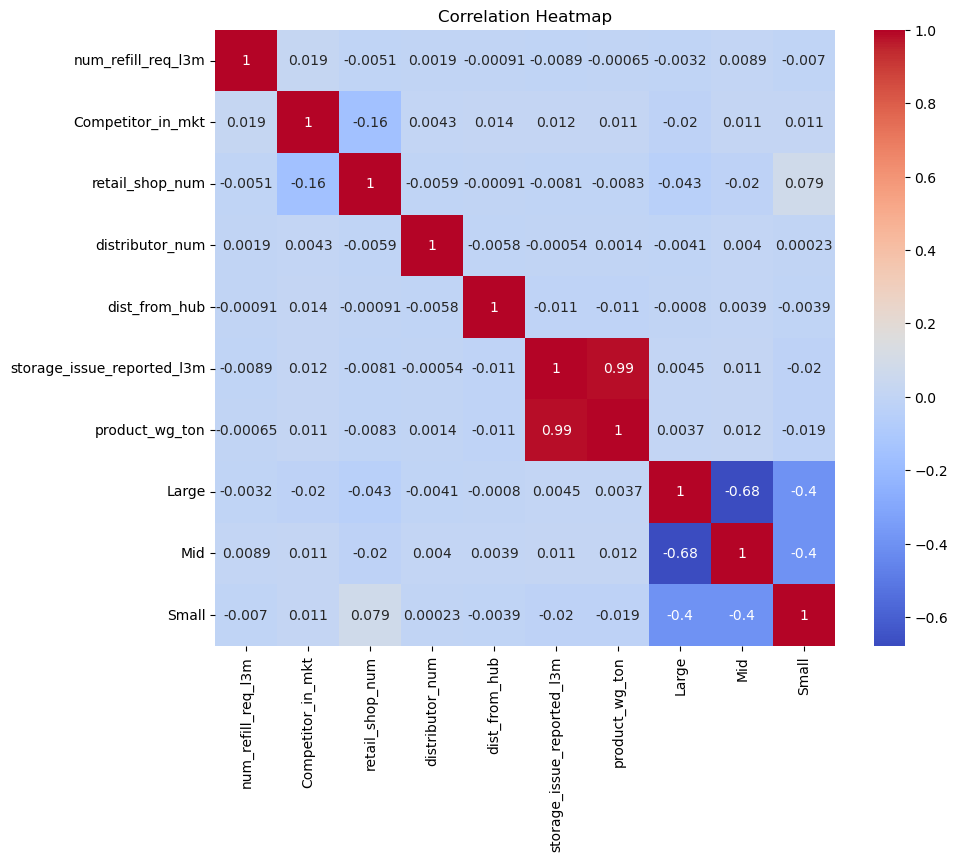

In [37]:
corr=df5.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [38]:
X=df5.drop('product_wg_ton',axis='columns')
y=df5.product_wg_ton

#### Hyperparameter Tuning

In [39]:
# to check which algorithm is the best
model_params = {
        "Linear Regression" : {
            "model": LinearRegression(),
            "params": {
                "fit_intercept": [True, False]
            }
        },
        "Lasso Regression": {
            "model": Lasso(),
            "params": {
                "alpha": [0.01, 0.1, 1.0, 10.0]
            }
        },
        "Decision Tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "max_depth":[None, 10, 20, 30]
            }
        },
        "Random Forest": {
            "model": RandomForestRegressor(),
            "params": {
                "n_estimators":[100, 200, 300]
            }
        },
        "K-Nearest Neighbors": {
            "model": KNeighborsRegressor(),
            "params": {
                "n_neighbors":[3, 5, 7]                 
            }
        }
    }


In [40]:
scores = []
cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=0 )

for algo_name, config in model_params.items():
        gs =  GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({     
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
 
 

In [41]:
pd.DataFrame(scores)

,model,best_score,best_params
0,Linear Regression,0.973727,{'fit_intercept': True}
1,Lasso Regression,0.973741,{'alpha': 10.0}
2,Decision Tree,0.978972,{'max_depth': 10}
3,Random Forest,0.981089,{'n_estimators': 300}
4,K-Nearest Neighbors,0.595310,{'n_neighbors': 3}


#### Creating the Model

In [42]:
# 20% test samples and 80% for the training

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [43]:
# creating LinearRegression model
# once the model is trained, we then evaluate the score of the model

model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [44]:
model.score(X_test,Y_test)

0.9729439613332327

In [45]:
# Use k fold cros validation to measure the accuracy of the Linear Regression model
#ShuffleSplit for cross validation- it will randomize the sample, so each of the fold have equal distribution of the sample.

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.97516111, 0.97164375, 0.97505527, 0.97331142, 0.9734614 ])

#### Loading Test Data and Preprocess the data

In [46]:
testdata=pd.read_csv('supply_test.csv')


In [47]:
testdata

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,NaN,13,0,B,3,28,15055


#### Function for performing preprocessing of data

In [48]:
def preprocess_test_data(df):
    # selecting only the columns which we are using.
    df= df[['WH_capacity_size','num_refill_req_l3m','Competitor_in_mkt',
            'retail_shop_num','distributor_num','dist_from_hub',
            'storage_issue_reported_l3m','product_wg_ton']]
    
    # converting the WH_capacity_size column into numerical by using dummies and concatinating that into the original.
    dummies=pd.get_dummies(df.WH_capacity_size)
    df1=pd.concat([df,dummies],axis='columns')
    df2 = df1.drop(['WH_capacity_size'],axis='columns')
    
    return df2

In [49]:
preprocessed_test_data = preprocess_test_data(testdata)

In [50]:
preprocessed_test_data

,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,storage_issue_reported_l3m,product_wg_ton,Large,Mid,Small
0,5,3,5590,15,156,24,30132,1,0,0
1,5,2,5856,40,79,5,6075,1,0,0
2,3,3,4803,40,70,19,24076,0,0,1
3,5,2,4784,15,255,9,13092,0,1,0
4,6,4,3699,24,205,25,29071,0,1,0
...,...,...,...,...,...,...,...,...,...,...
5524,8,3,5030,46,203,22,29138,1,0,0
5525,3,3,4320,60,170,26,33108,0,0,1
5526,7,2,5268,64,99,20,24072,1,0,0
5527,6,4,4378,32,220,13,15055,1,0,0


In [51]:
X_test = preprocessed_test_data.drop('product_wg_ton',axis='columns')

y_test = preprocessed_test_data.product_wg_ton

# Use the trained model to make predictions on the new data
y_predict = model.predict(X_test)

# Print or use the predicted values as needed
print("Predicted values:", y_predict)

Predicted values: [30696.40845327  6950.900706   24381.76591529 ... 25817.15728693
 16982.82659863 14437.07607618]


### Evaluating the Model

In [52]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1345.2939279130903


In [53]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_predict)
print("Accuracy Score:", r2_score)

Accuracy Score: 0.9743079441031394


In [54]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_predict)

# Print or use the MSE as needed
print("Mean Squared Error:", mse)

Mean Squared Error: 3483809.2627079366


In [55]:
# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)

# Print or use the RMSE as needed
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1866.4965209471827


#### Residual Plots

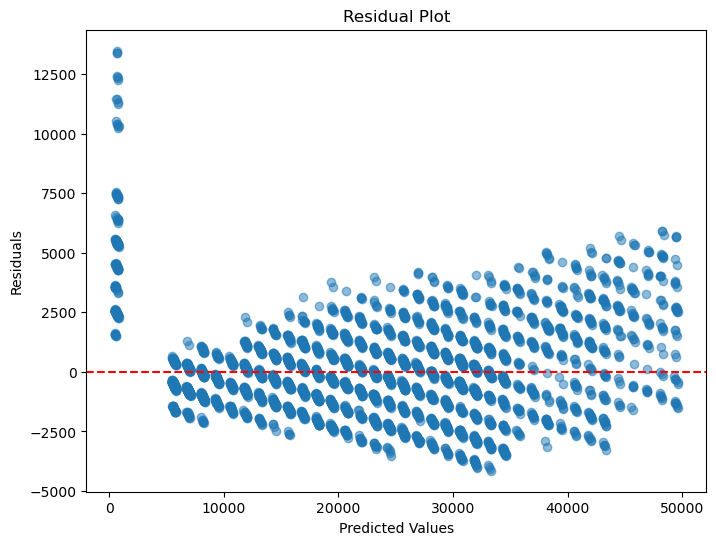

In [56]:
# Calculate the residuals (the differences between the true target values and the predicted values)
residuals = y_test - y_predict

# Plot the residuals against the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

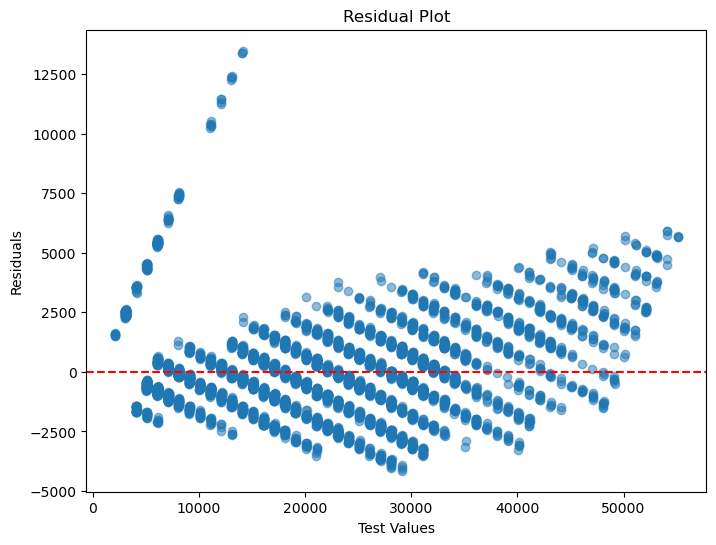

In [57]:
# Plot the residuals against the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Test Values')
plt.ylabel('Residuals')
plt.show()

#### The residuals should be randomly scattered around the horizontal line at y=0, with no discernible pattern. Thus, our model's assumptions and predictions appear to be correct.

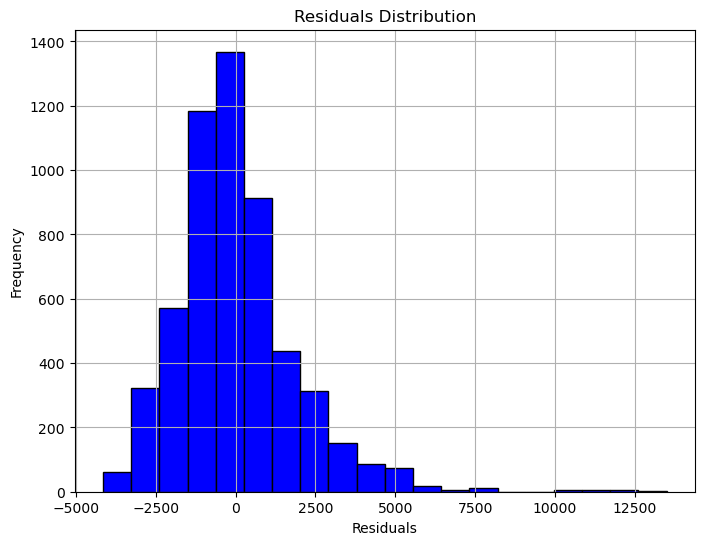

In [58]:
# Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

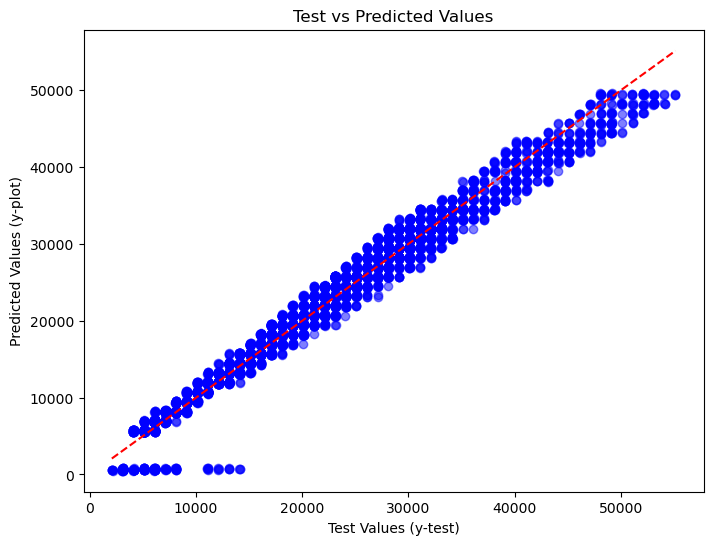

In [59]:
# Plot the true target values (y_test) against the predicted values (y_predict)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Test vs Predicted Values')
plt.xlabel('Test Values (y-test)')
plt.ylabel('Predicted Values (y-plot)')
plt.show()

#### This plot provides a visual assessment of the model's performance and can help identify any systematic biases or trends in the predictions. A well-fitted model would show points clustered closely around the diagonal line, indicating accurate predictions. So, it is accurate prediction.


In [60]:
model.predict([[8, 11, 3456,80,500,35,0,1,0]])

array([44547.8813468])

### Predicting the weight of the production in tons

#### Function for performing prediction

In [61]:
def predict_weight(num_refill_req_l3m, Competitor_in_mkt, retail_shop_num, distributor_num, dist_from_hub, storage_issue_reported,Large, Mid, Small):
    try:
        num_refill_req_l3m = int(num_refill_req_l3m)
        Competitor_in_mkt = int(Competitor_in_mkt)
        retail_shop_num = int(retail_shop_num)
        distributor_num = int(distributor_num)
        dist_from_hub = int(dist_from_hub)
        storage_issue_reported = int(storage_issue_reported)
        Large = int(Large)
        Mid = int(Mid)
        Small = int(Small)
    
        return model.predict([[num_refill_req_l3m, Competitor_in_mkt, retail_shop_num, distributor_num, dist_from_hub, storage_issue_reported,Large, Mid, Small]])
    except ValueError:
        print("input Error")

In [62]:
predict_weight(12, 48, 13456,80,500,35,0,1,0)

array([43991.95001719])

In [63]:
predict_weight(87,45,11890,56,254,67,1,0,0)

array([86600.27949317])

#### Export the tested model to a pickle file

In [64]:
import pickle
with open('Supply_chain_management_model.pkl','wb') as file:
    pickle.dump(model, file)

#### Export location and column information to a file that will be useful later on in our prediction application

In [65]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("SCM_columns.json","w") as f:
    f.write(json.dumps(columns))